Alexandre Lebas - Océane Deletrez

# Introduction
<p> Contrairement a ce que nous avons vu avant les méthodes de clustering font partie des méthodes de classification non supervisée c'est-à-dire que l'on entraine sur des données où on ne connaît pas la classe et l'algorithme va devoir trouver lui-même les classes.</p>

# The k-Means Clustering
 <p>Cet algorithme est une méthode de clustering qui consiste à créer k cluster avec n points. Pour cette méthode on génère au départ k points alétoires. Chaque point correspondant à la moyenne d'un cluster, on regarde a quel cluster appartient chaque point (dans les n points) pour savoir cela on regarde quelle point correspondant à la moyenne d'un cluster correspond. Pour finir on met à jour la moyenne de chaque cluster en fonction de tous les points. Puis on répète cette démarche jusqu'à ce qu'il y ait convergence et que les k points correspondant aux moyennes des clusters ne bougent plus.</p>
 
 

In [1]:
iris2 <- iris
iris2$Species <- NULL
(kmeans.result <- kmeans(iris2, 3))

K-means clustering with 3 clusters of sizes 50, 38, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     6.850000    3.073684     5.742105    2.071053
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 15.15100 23.87947 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [2]:
table(iris$Species, kmeans.result$cluster)

            
              1  2  3
  setosa     50  0  0
  versicolor  0  2 48
  virginica   0 36 14

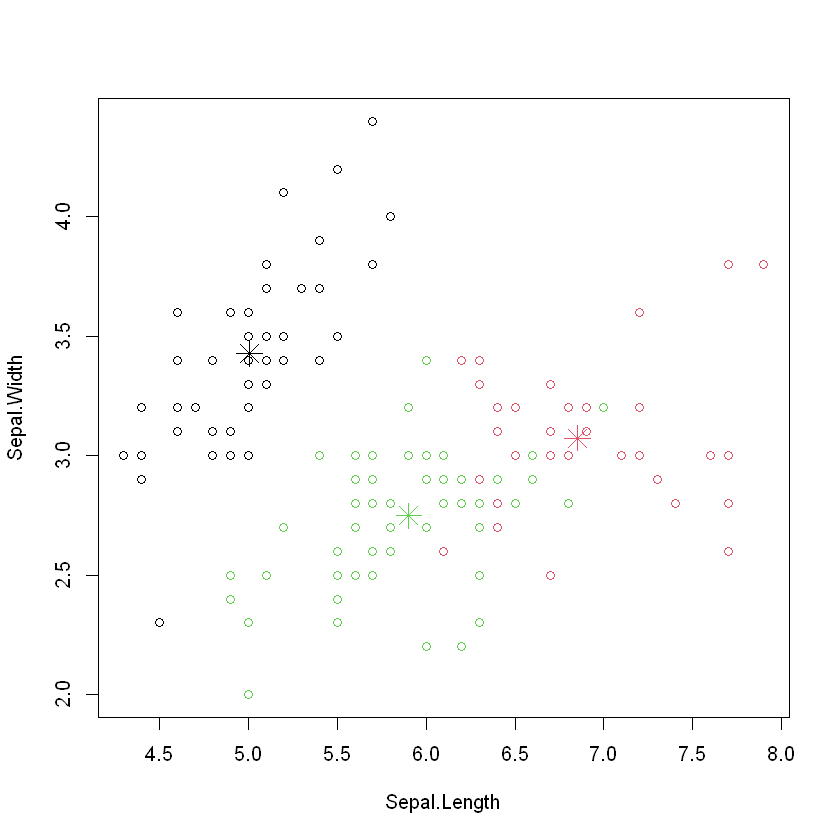

In [3]:
plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster)
points(kmeans.result$centers[,c("Sepal.Length", "Sepal.Width")], col = 1:3,
pch = 8, cex=2)

# The k-Medoids Clustering
<p> Cette algorithme ressemble beaucoup à l'algorithme précédent mais au lieu de prendre un point k correspondant à la moyenne du cluster nous prenons le point qui est le plus proche de la moyenne du cluster.</p>

In [4]:
install.packages("fpc")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  impossible d'ouvrir l'URL 'https://cran.r-project.org/src/contrib/PACKAGES'"
Warning message:
"le package 'fpc' n'est pas disponible for this version of R

Une version de ce package pour votre version de R est peut-être disponible ailleurs,
Voyez des idées à
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/4.1:
  impossible d'ouvrir l'URL 'https://cran.r-project.org/bin/windows/contrib/4.1/PACKAGES'"


In [5]:
library(fpc)

La méthode pamk est une méthode qui détermine automatiquement k

In [6]:
pamk.result <- pamk(iris2)
pamk.result$nc

[1] 2

In [7]:
table(pamk.result$pamobject$clustering, iris$Species)

   
    setosa versicolor virginica
  1     50          1         0
  2      0         49        50

In [8]:
layout(matrix(c(1,2),1,2))
#plot(pamk.result$pamobject)
layout(matrix(1)) 

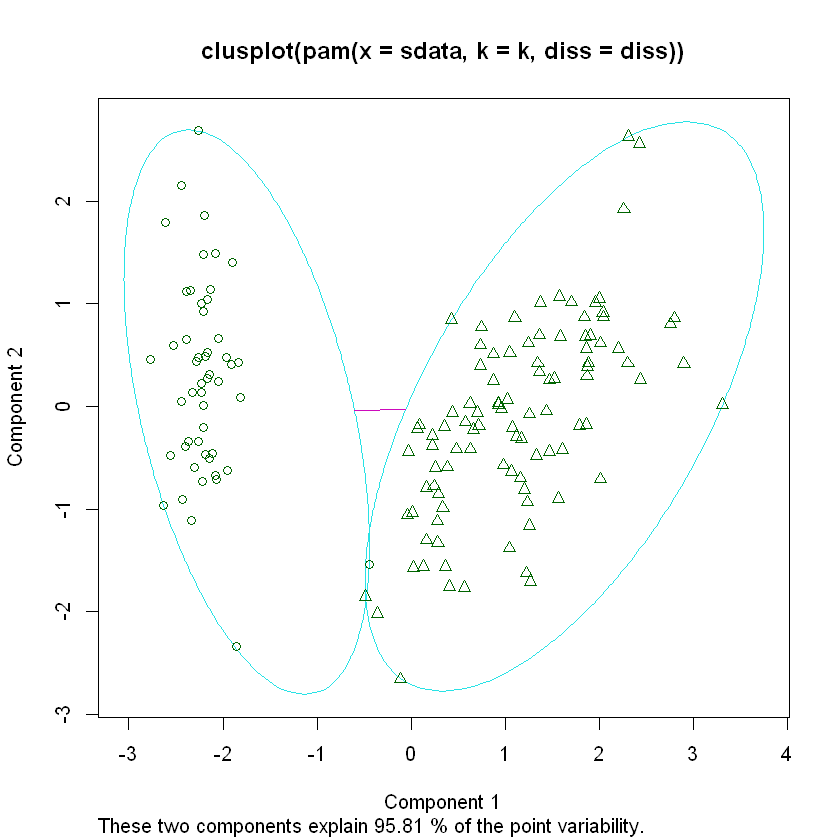

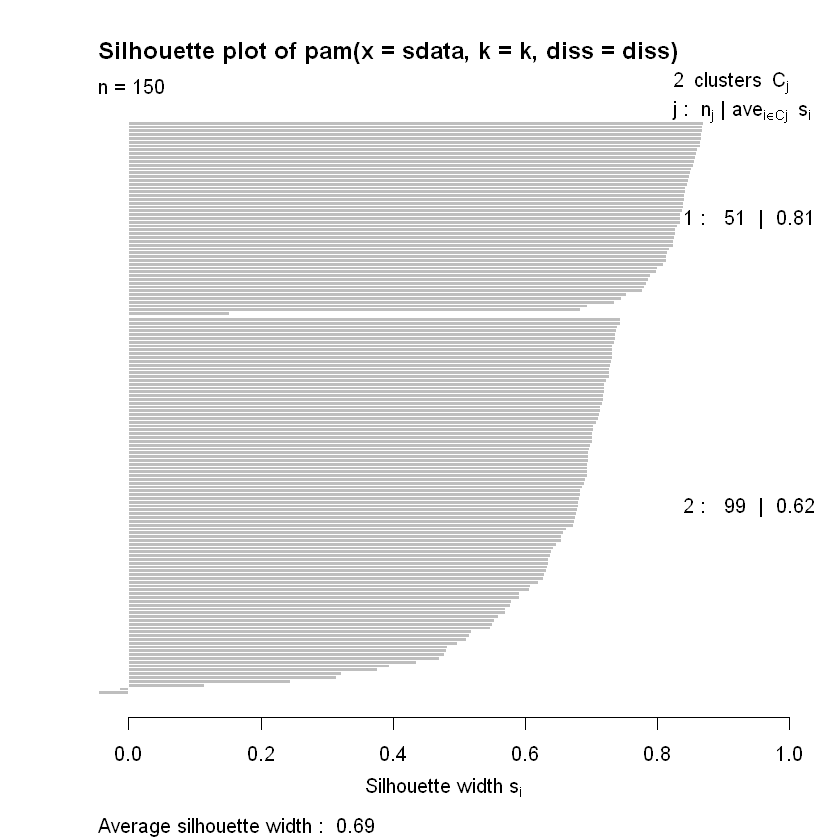

In [9]:
plot(pamk.result$pamobject)

In [10]:
install.packages("cluster")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  impossible d'ouvrir l'URL 'https://cran.r-project.org/src/contrib/PACKAGES'"
Warning message:
"le package 'cluster' n'est pas disponible for this version of R

Une version de ce package pour votre version de R est peut-être disponible ailleurs,
Voyez des idées à
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/4.1:
  impossible d'ouvrir l'URL 'https://cran.r-project.org/bin/windows/contrib/4.1/PACKAGES'"


In [11]:
library(cluster)

La méthode pam au contraire de pamk ne détermine pas k nous devons le fixer. Ce qui ici est plus efficace. pamk n'arrive qu'a determiné 2 clusters pour 3 classes avec pam nous pouvons dire que k=3

In [12]:
pam.result <- pam(iris2, 3)
table(pam.result$clustering, iris$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48        14
  3      0          2        36

In [13]:
layout(matrix(c(1,2),1,2))
#plot(pam.result)
layout(matrix(1))

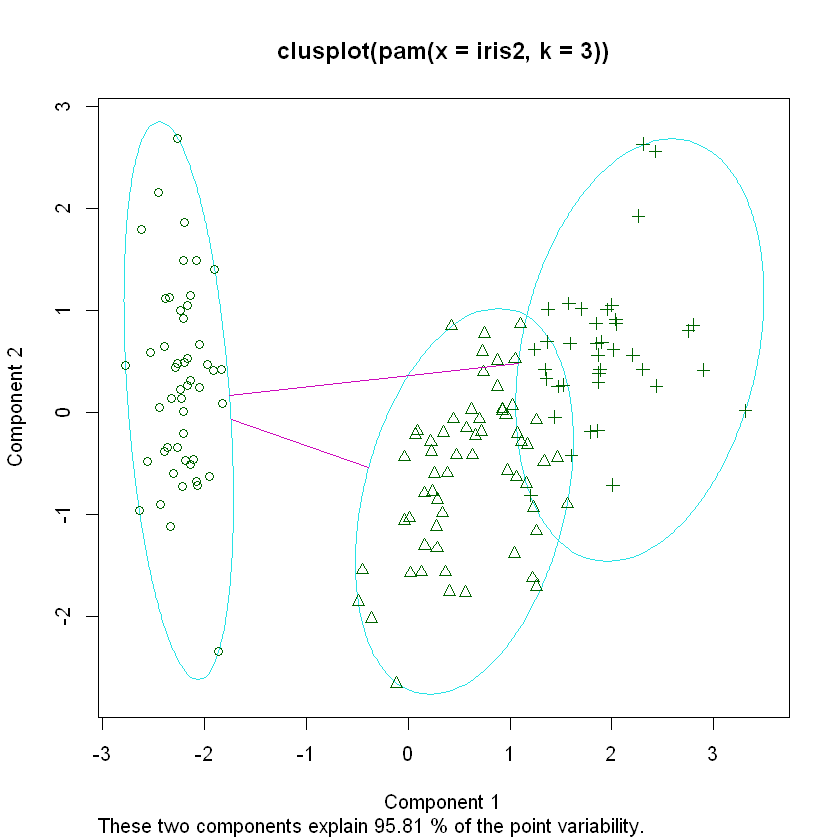

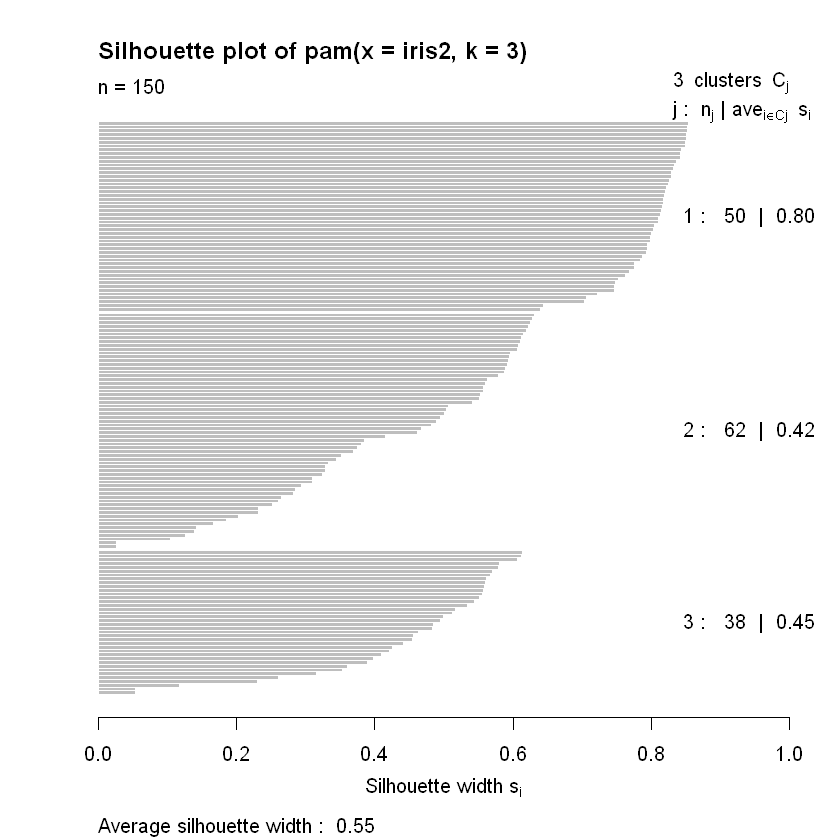

In [14]:
plot(pam.result)

# Hierarchical Clustering
<p>Cette méthode de clustering est très différente des deux autres. Si nous recherchons toujours k clusters dans n points nous ne partons pas de k points représentant les moyennes de k clusters. Nous partons du principe qu'au début que chaque point représente un cluster (c'est-à-dire n clusters). Nous cherchons à avoir uniquement 3 (k généralement) clusters. Pour cela nous allons faire plusieurs itérations afin de réduire le nombre de clusters. A chaque itération on va fusionner deux clusters en 1 pour cela on va fusionner les deux clusters les plus proches.</p>

In [15]:
idx <- sample(1:dim(iris)[1], 40)
irisSample <- iris[idx,]
irisSample

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
59,6.6,2.9,4.6,1.3,versicolor
129,6.4,2.8,5.6,2.1,virginica
144,6.8,3.2,5.9,2.3,virginica
70,5.6,2.5,3.9,1.1,versicolor
24,5.1,3.3,1.7,0.5,setosa
9,4.4,2.9,1.4,0.2,setosa
109,6.7,2.5,5.8,1.8,virginica
112,6.4,2.7,5.3,1.9,virginica
53,6.9,3.1,4.9,1.5,versicolor


In [16]:
irisSample$Species <- NULL
hc <- hclust(dist(irisSample), method="ave")

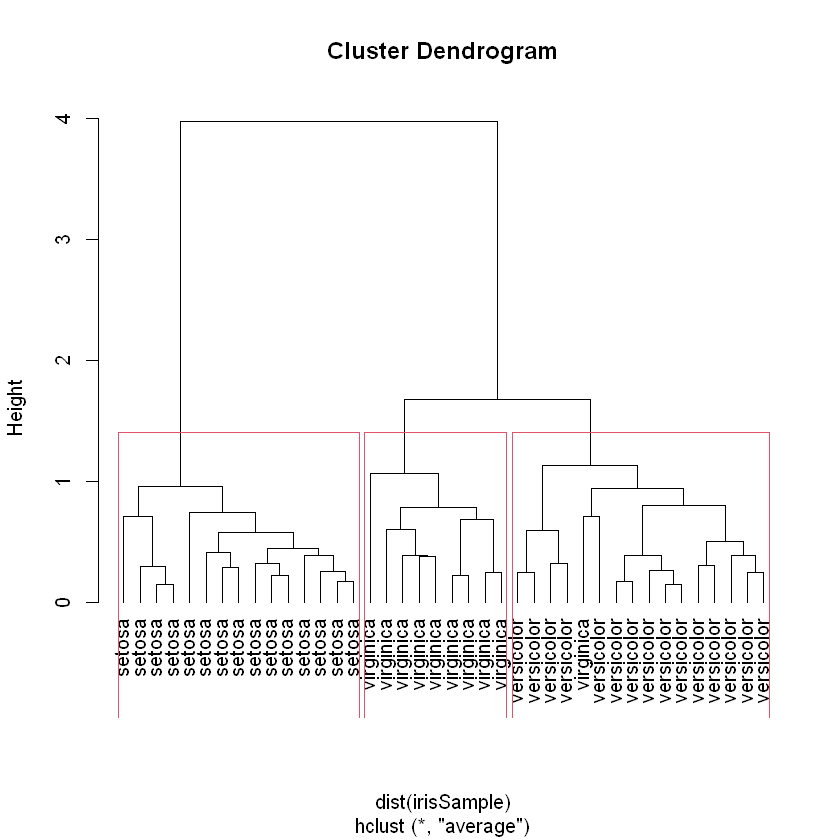

In [17]:
plot(hc, hang = -1, labels=iris$Species[idx])
rect.hclust(hc, k=3)
groups = cutree(hc, k=3)

In [18]:
hcFull <- hclust(dist(iris2), method="ave")

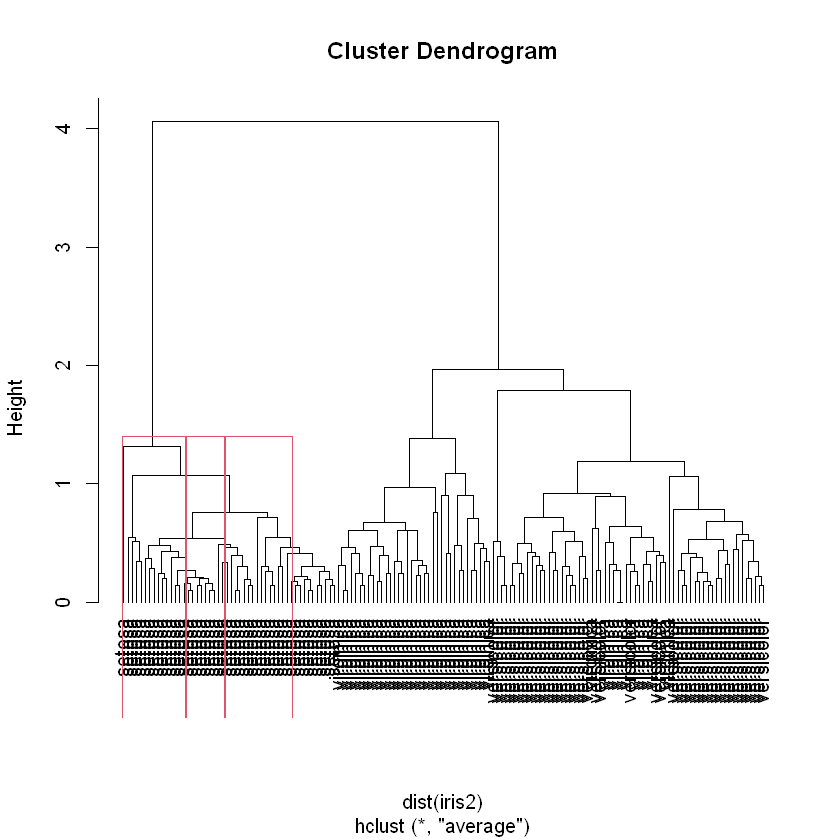

In [19]:
plot(hcFull, hang = -1, labels=iris$Species)
rect.hclust(hc, k=3)
groups <- cutree(hc, k=3)

# Density-based Clustering
<p>Pour la dernière méthode celle-ci est trés différente des trois autres. Ici nous allons avoir k+1 clusters (dans notre cas 4). DBSCAN est une méthode qui détermine automatiquement k en fonction de 2 paramètres, le premier est eps et le dernier MinPts. Dans un premier temps il faut prendre un point donné que l'on n'a pas visité et de regarder si dans un rayon eps autour de lui il y a MinPts ou plus alors ce point et les points aux alentours font partie d'un cluster. Ensuite nous parcourons chaque point proche des points appartenant au cluster et nous vérifions si celui-ci n'appartient pas a un autre cluster et nous regardont si jamais d'autres point aux alentours repondent aux conditions pour être dans le cluster. Si jamais un point ne répond pas aux conditions requises alors celui-ci est placé dans un cluster à part qui correspond au bruit (anomalies).</p>

In [20]:
 iris2 <- iris[-5] # remove class tags
iris2

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2


In [21]:
 ds <- dbscan(iris2, eps=0.42, MinPts=5)
table(ds$cluster, iris$Species)

   
    setosa versicolor virginica
  0      2         10        17
  1     48          0         0
  2      0         37         0
  3      0          3        33

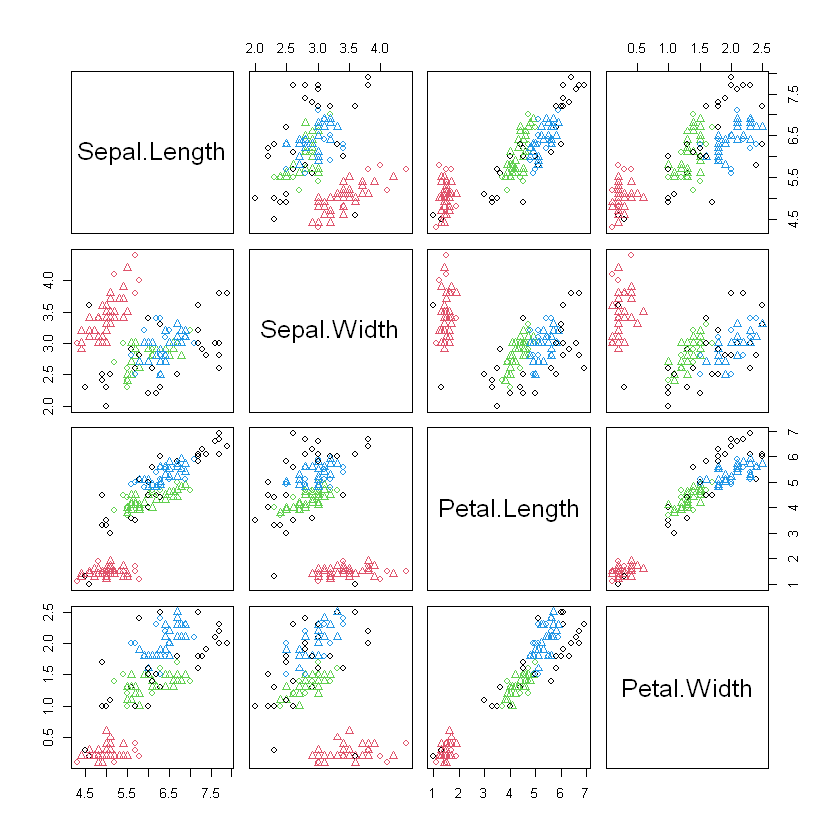

In [22]:
plot(ds, iris2)

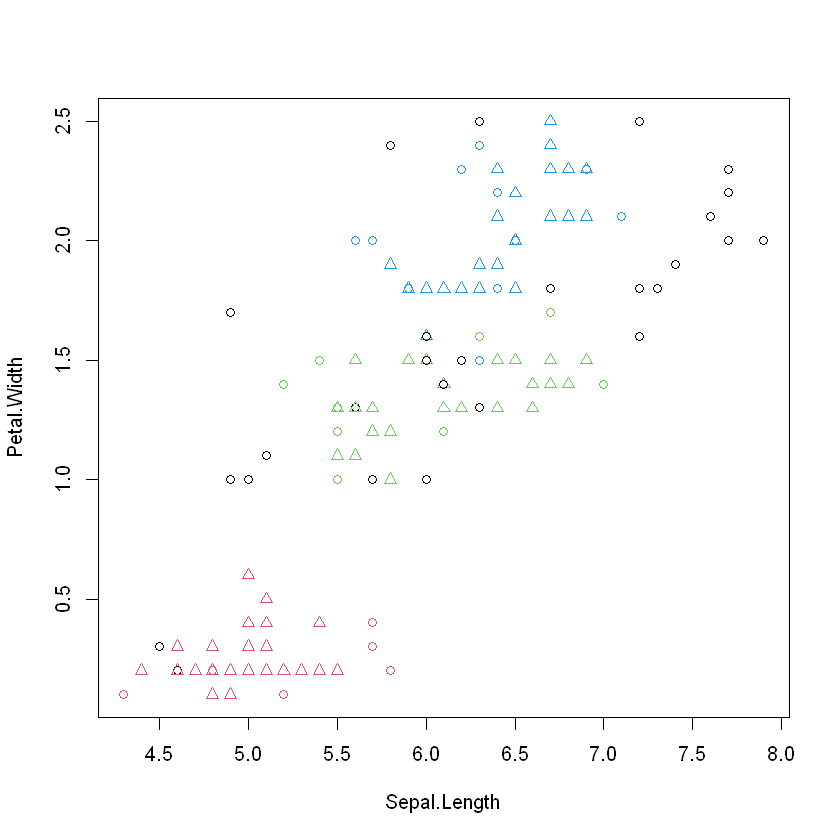

In [23]:
plot(ds, iris2[c(1,4)])

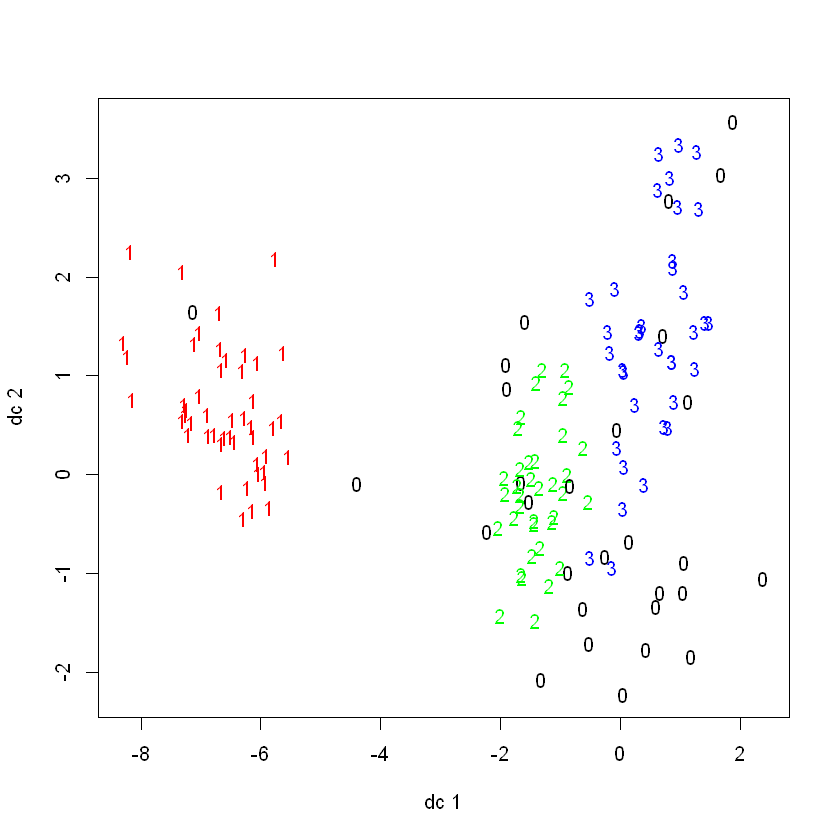

In [24]:
plotcluster(iris2, ds$cluster)

In [25]:
set.seed(435)

      
myPred setosa versicolor virginica
     0      0          2         0
     1      2          0         0
     2      0          3         0
     3      0          2         1

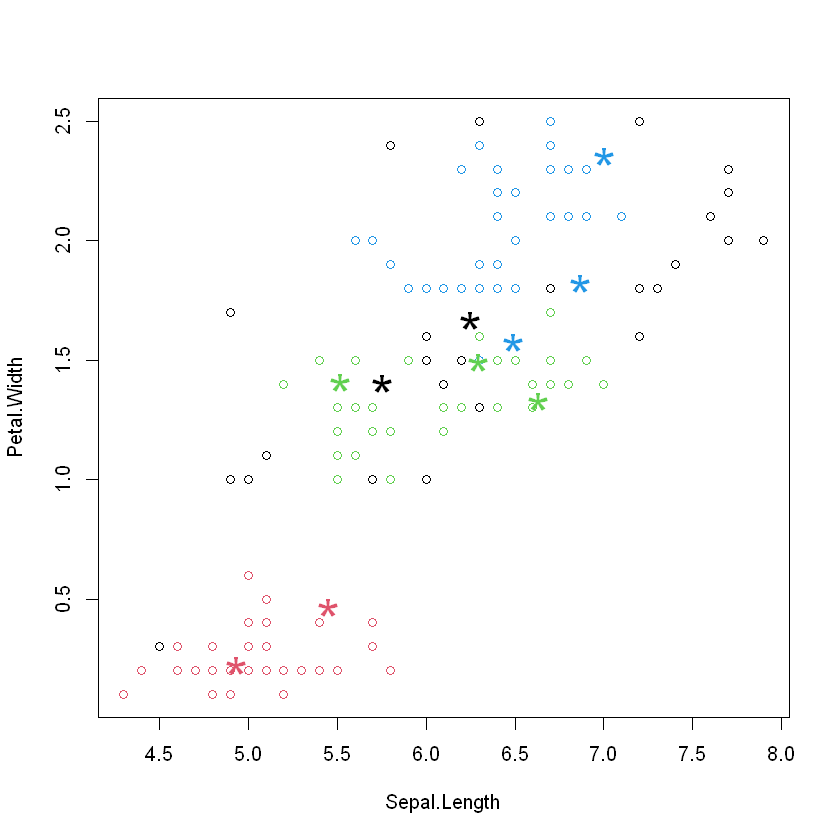

In [26]:
idx <- sample(1:nrow(iris), 10)
newData <- iris[idx,-5]
newData <- newData + matrix(runif(10*4, min=0, max=0.2), nrow=10, ncol=4)
myPred <- predict(ds, iris2, newData)
plot(iris2[c(1,4)], col=1+ds$cluster)
points(newData[c(1,4)], pch="*", col=1+myPred, cex=3)
table(myPred, iris$Species[idx])

# Cas concrets d'utilisation 

Segmentation d'image : 
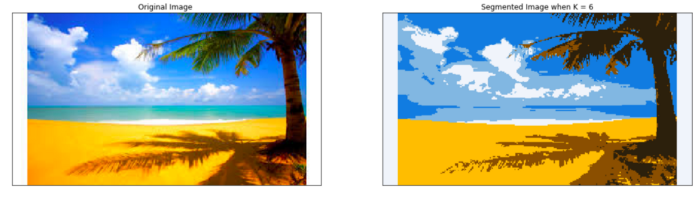

On peut aussi faire de l'apprentissage semi-supervisé 
<img src="semiSuper.png">